17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 115ms/step - loss: 0.5065 - accuracy: 0.7797 - val_loss: 0.3782 - val_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 2s 69ms/step - loss: 0.3047 - accuracy: 0.9001 - val_loss: 0.3015 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2286 - accuracy: 0.9246 - val_loss: 0.3018 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1868 - accuracy: 0.9368 - val_loss: 0.3006 - val_accuracy: 0.8770
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1548 - accuracy: 0.9504 - val_loss: 0.2779 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1305 - accuracy: 0.9575 - val_loss: 0.2869 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1114 - accura

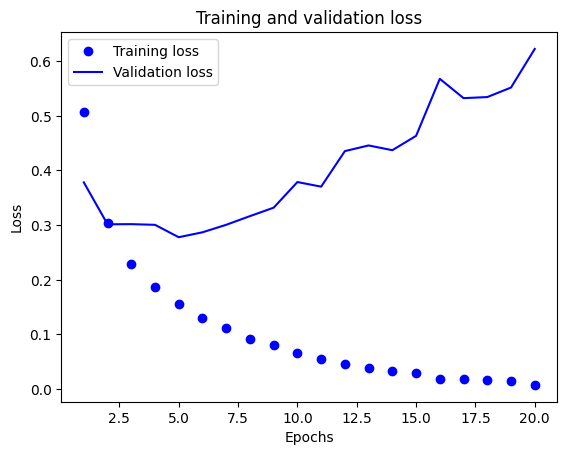

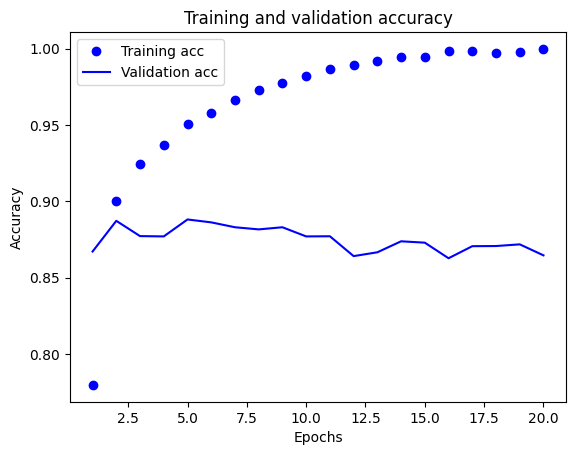

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4604 - accuracy: 0.8184
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2766 - accuracy: 0.9021
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2181 - accuracy: 0.9209
Epoch 4/4
782/782 [==============================] - 3s 4ms/step


array([[0.23063308],
       [0.99951184],
       [0.8587714 ],
       ...,
       [0.11552341],
       [0.09638342],
       [0.6908946 ]], dtype=float32)

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

model.predict(x_test)